### Train-on-one, predict-on-another, experiment #1

2022-11-10 audit version, re-run on data_5k_stacked

From version 01, deleting train-of-though devel notes in this v2

In [8]:
%whos

Variable                 Type               Data/Info
-----------------------------------------------------
Activation               type               <class 'keras.layers.core.activation.Activation'>
BatchNormalization       type               <class 'keras.layers.norm<...>tion.BatchNormalization'>
Callback                 type               <class 'keras.callbacks.Callback'>
K                        TFModuleWrapper    <module 'tensorflow.compa<...>ras/backend/__init__.py'>
Layer                    type               <class 'keras.engine.base_layer.Layer'>
Model                    type               <class 'keras.engine.training.Model'>
RandomForestClassifier   ABCMeta            <class 'sklearn.ensemble.<...>.RandomForestClassifier'>
binary_crossentropy      function           <function binary_crossentropy at 0x2a1a39b80>
f1_score                 function           <function f1_score at 0x138b19820>
figure                   function           <function figure at 0x28dd98550>
glob   

#### Imports

In [2]:
import time # for fitting run time comparisons

# from sklearn.ensemble import RandomForestClassifier # DT?, send to e_
# from sklearn.metrics import f1_score
# from sklearn.model_selection import train_test_split

# from statistics import mean # sent to e_
# from statistics import stdev

import glob as glob

import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure # ?

import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.layers import BatchNormalization, Activation, Layer
from tensorflow.keras import metrics, optimizers
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.callbacks import Callback

import tensorflow.compat.v1.keras.backend as K
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

import umap.umap_ as umap

In [ ]:
# Primary goal is swtich to data_5k_stacked - 
# Secondary goal is to move classifier code to the e_ dir - done

note:
add resampling and train test split count to the file naming - done
( should be five and five )

In [5]:
# this is the VAE ( b_ ) dir, read stacked MAD 5k, train model,
# decode the held-out cohort, write the decoded file - target: 

In [9]:
mkdir test-dash

In [11]:
rm -r test-dash/

In [4]:
mkdir train-on-one_decoded

In [6]:
paths = sorted(glob.glob('data_5k_stacked/*.tsv'))

In [7]:
plt_v=16 # Train-on-one experiment redo, continue

In [26]:
blnk_frm.to_csv('raw_baseline_F1s/5k_r13.tsv', sep = '\t')

In [153]:
bfr = pd.read_csv('raw_baseline_F1s/5k_r13.tsv', sep = '\t', index_col = 0) # blank frame read

#### Plot original - send to d_, looks like there is already three options

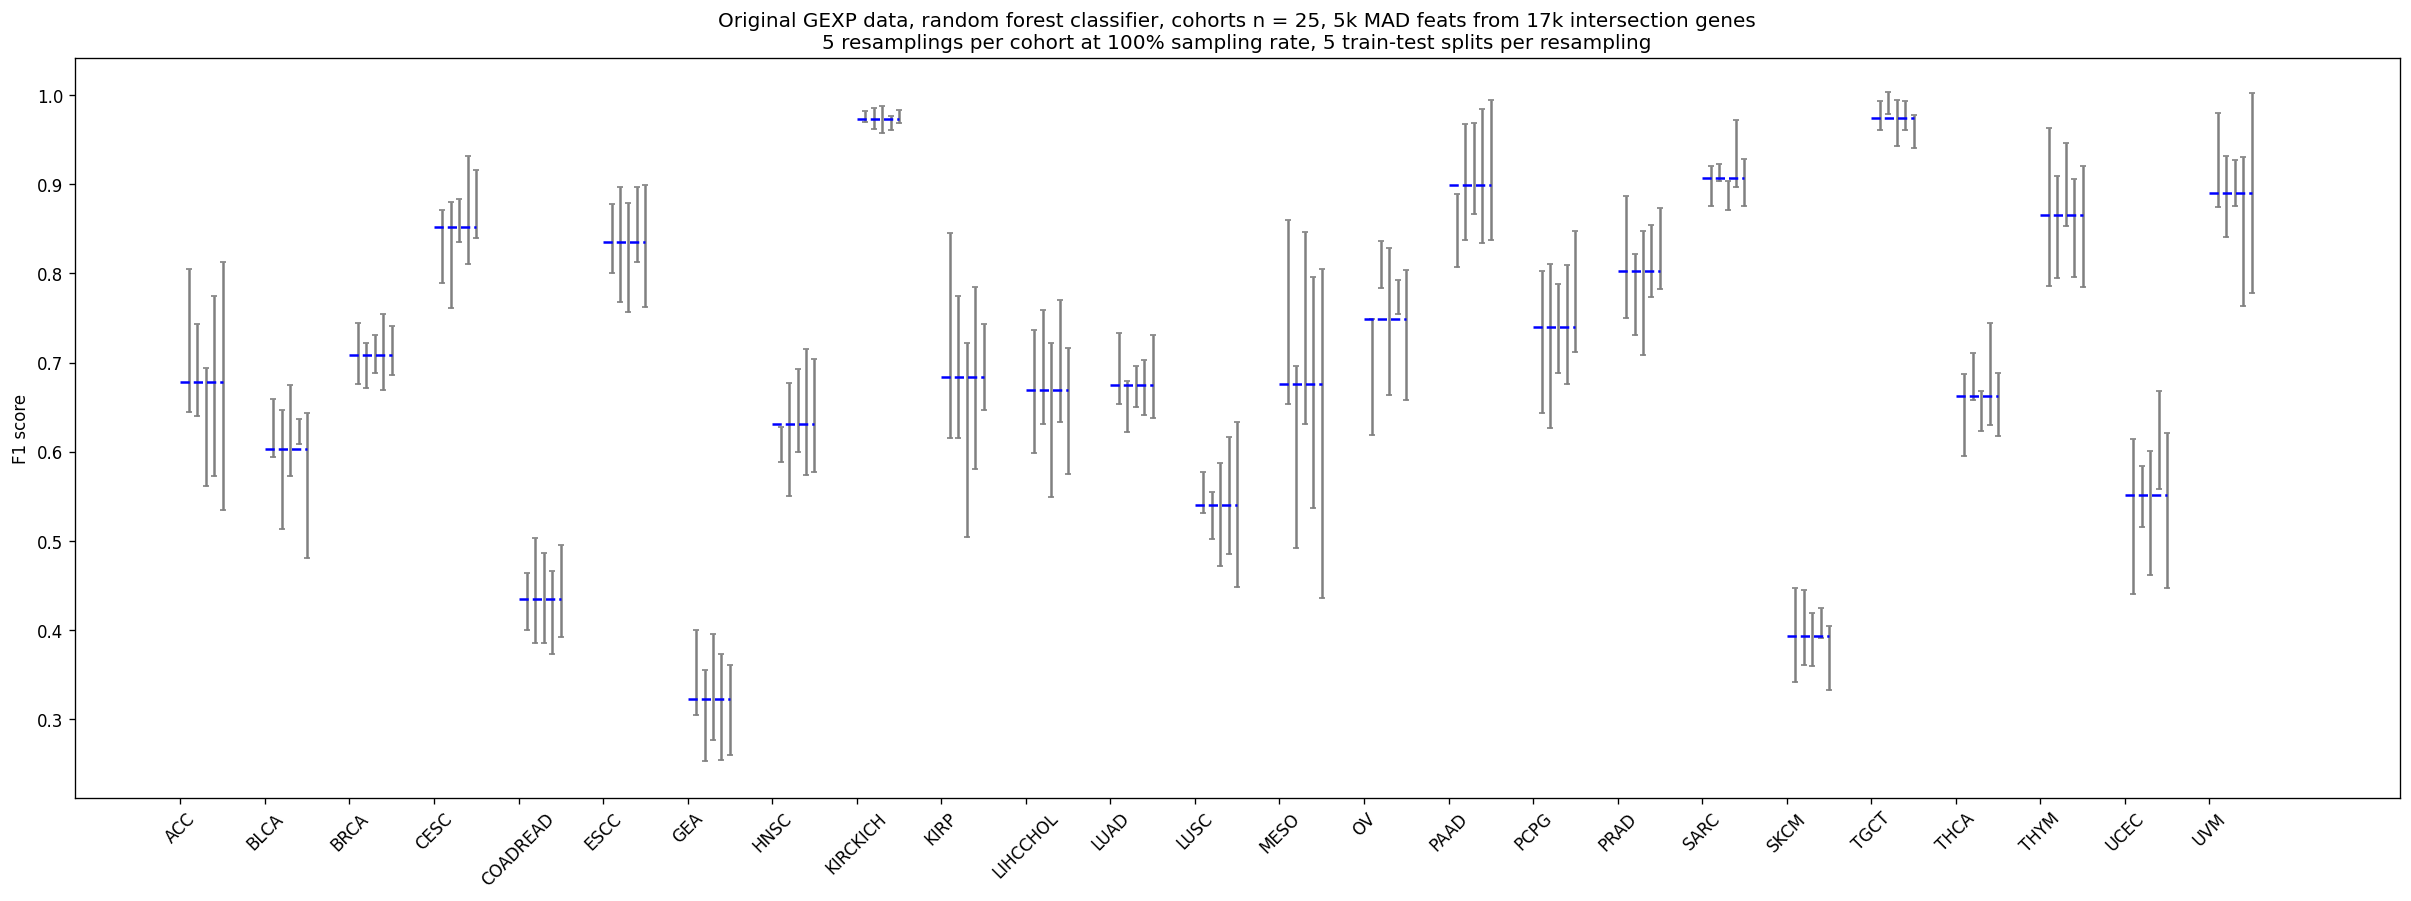

In [154]:
# Raw samples
plt_v=13
figure(figsize=(len(bfr.index), 8), dpi=120)
plt.scatter(.01, .99, color = 'white')
x_tck_lst = []
cohort_list = []
for idx_pos, idx in enumerate(bfr.index): # Blank frame read

    x = idx_pos
    ave_mean = []
    for rs in list(range(0,re_samp)): # use to step through the columns

        adder = .1
        x = x+adder
        plt.errorbar(
            x,
            bfr.loc[idx, 'mean'+str(rs)],
            yerr=bfr.loc[idx, 'std'+str(rs)], capsize = 2,
            color = 'grey')
        ave_mean.append(bfr.loc[idx, 'mean'+str(rs)])
        
    x_points = [x-.5, x]
    y_points = [mean(ave_mean), mean(ave_mean)]
    plt.plot(x_points, y_points, linestyle='dashed', color = 'blue')
    # break
    x_tck_lst.append(idx_pos)
    cohort_list.append(idx.split('_')[0])
plt.xticks(x_tck_lst, labels = cohort_list, rotation = 45)
# plt.set_xticklabels(cohort_list)
plt.ylabel('F1 score')
plt.scatter(25, .25, color = 'white')# BRCA settings    
plt.title('Original GEXP data, random forest classifier, cohorts n = 25, 5k MAD feats from 17k intersection genes\n'+
         str(re_samp)+' resamplings per cohort at 100% sampling rate, 5 train-test splits per resampling')
plt.annotate(str(re_samp * trn_tst_splts)+' trn tst splts', (x-.2,1.-3))
plt.savefig('raw_baseline_plots/cohorts_n=25_v'+str(plt_v)+'.png', dpi = 120)

In [ ]:
# end raw, v13 check

#### Devel notes

#### Tybalt decoded sample generation, for input to same RF pipeline to compare with original
Train on one cohort, predict on another cohort - production run  
Seperat original and VAE decoded RF plots in v5, here gen blank frame, send to modded (for t1pa) overlay

In [3]:
chrt_i = 23

In [5]:
paths[chrt_i]

'data/UCEC.tsv'

In [38]:
pre_train_paths = ['data/ACC.tsv',
 'data/BLCA.tsv',
 # 'data/BRCA.tsv',
 'data/CESC.tsv',
 'data/COADREAD.tsv',
 'data/ESCC.tsv',
 'data/GEA.tsv',
 'data/HNSC.tsv',
 'data/KIRCKICH.tsv',
 'data/KIRP.tsv',
 'data/LIHCCHOL.tsv',
 'data/LUAD.tsv',
 'data/LUSC.tsv',
 'data/MESO.tsv',
 'data/OV.tsv',
 'data/PAAD.tsv',
 'data/PCPG.tsv',
 'data/PRAD.tsv',
 'data/SARC.tsv',
 'data/SKCM.tsv',
 'data/TGCT.tsv',
 'data/THCA.tsv',
 'data/THYM.tsv',
 'data/UCEC.tsv',
 'data/UVM.tsv']

In [57]:
pre_train_paths

['data/ACC.tsv',
 'data/BLCA.tsv',
 'data/CESC.tsv',
 'data/COADREAD.tsv',
 'data/ESCC.tsv',
 'data/GEA.tsv',
 'data/HNSC.tsv',
 'data/KIRCKICH.tsv',
 'data/KIRP.tsv',
 'data/LIHCCHOL.tsv',
 'data/LUAD.tsv',
 'data/LUSC.tsv',
 'data/MESO.tsv',
 'data/OV.tsv',
 'data/PAAD.tsv',
 'data/PCPG.tsv',
 'data/PRAD.tsv',
 'data/SARC.tsv',
 'data/SKCM.tsv',
 'data/TGCT.tsv',
 'data/THCA.tsv',
 'data/THYM.tsv',
 'data/UCEC.tsv',
 'data/UVM.tsv']

In [40]:
len(pre_train_paths)

24

### Build Model

In [34]:
# Function set for leave one out loop
def compute_latent(x): # x:
    mu, sigma = x
    batch = K.shape(mu)[0]
    dim = K.shape(mu)[1]
    eps = K.random_normal(shape=(batch,dim), mean=0., stddev=1.0 )
    return mu + K.exp(sigma/2)*eps

In [35]:
# Set custom layer , will need all this at start of shell script
class CustomVariationalLayer(Layer):
    """
    Define a custom layer
    """
    def __init__(self, **kwargs):
        self.is_placeholder = True
        super(CustomVariationalLayer, self).__init__(**kwargs)

    def vae_loss(self, x_input, x_decoded):
        reconstruction_loss = original_dim * metrics.binary_crossentropy(x_input, x_decoded)
        kl_loss = - 0.5 * K.sum(1 + z_log_var_encoded - K.square(z_mean_encoded) - 
                                K.exp(z_log_var_encoded), axis=-1)
        return K.mean(reconstruction_loss + (K.get_value(beta) * kl_loss))

    def call(self, inputs):
        x = inputs[0]
        x_decoded = inputs[1]
        loss = self.vae_loss(x, x_decoded)
        self.add_loss(loss, inputs=inputs)
        return x

In [36]:
class WarmUpCallback(Callback):
    def __init__(self, beta, kappa):
        self.beta = beta
        self.kappa = kappa

    def on_epoch_end(self, epoch, logs={}):
        if K.get_value(self.beta) <= 1:
            K.set_value(self.beta, K.get_value(self.beta) + self.kappa)

### 5k data read

In [69]:
df.head()

,Labels,N:GEXP::?:100133144:,N:GEXP::?:100134869:,N:GEXP::?:10357:,N:GEXP::?:10431:,N:GEXP::?:155060:,N:GEXP::?:388795:,N:GEXP::?:390284:,N:GEXP::?:57714:,N:GEXP::?:645851:,...,N:GEXP::ZWINT:11130:,N:GEXP::ZXDA:7789:,N:GEXP::ZXDB:158586:,N:GEXP::ZXDC:79364:,N:GEXP::ZYG11A:440590:,N:GEXP::ZYG11B:79699:,N:GEXP::ZYX:7791:,N:GEXP::ZZEF1:23140:,N:GEXP::ZZZ3:26009:,N:GEXP::psiTPTE22:387590:
ACC,,,,,,,,,,,,,,,,,,,,,
TCGA-OR-A5J1,ACC_2,3.2661,3.9385,149.130,2034.1,274.25,0.0000,11.5270,282.420,1.4409,...,146.970,20.653,351.58,1050.90,0.4803,648.41,1841.00,1157.50,596.06,715.66
TCGA-OR-A5J2,ACC_2,2.6815,8.9948,81.078,1304.9,199.30,0.4026,5.2342,527.850,2.4158,...,438.460,57.173,279.02,2979.90,31.4050,1166.00,3060.00,1896.00,801.64,581.80
TCGA-OR-A5J3,ACC_3,1.7301,6.5650,86.488,1054.7,348.39,0.5925,7.7026,162.350,10.0730,...,190.190,39.698,495.33,914.83,0.5925,806.40,2655.60,1482.50,437.27,126.80
TCGA-OR-A5J5,ACC_3,0.0000,1.5492,53.912,2350.9,439.19,0.7746,6.1967,52.672,3.0984,...,840.430,17.816,206.04,890.78,11.6190,553.83,2367.90,1140.20,512.78,855.15
TCGA-OR-A5J6,ACC_1,0.0000,4.4709,66.906,1258.0,149.22,2.7943,10.6180,143.070,1.6766,...,63.151,12.854,117.92,894.73,7.8240,795.81,708.07,796.37,475.59,288.37


In [241]:
train_paths_5k = sorted(glob.glob('data_5k/*.tsv'))

In [245]:
len(train_paths_5k)

24

In [242]:
train_paths_5k

['data_5k/ACC_mad_5k.tsv',
 'data_5k/BLCA_mad_5k.tsv',
 'data_5k/BRCA_mad_5k.tsv',
 'data_5k/CESC_mad_5k.tsv',
 'data_5k/COADREAD_mad_5k.tsv',
 'data_5k/ESCC_mad_5k.tsv',
 'data_5k/GEA_mad_5k.tsv',
 'data_5k/HNSC_mad_5k.tsv',
 'data_5k/KIRCKICH_mad_5k.tsv',
 'data_5k/KIRP_mad_5k.tsv',
 'data_5k/LIHCCHOL_mad_5k.tsv',
 'data_5k/LUAD_mad_5k.tsv',
 'data_5k/LUSC_mad_5k.tsv',
 'data_5k/MESO_mad_5k.tsv',
 'data_5k/OV_mad_5k.tsv',
 'data_5k/PAAD_mad_5k.tsv',
 'data_5k/PCPG_mad_5k.tsv',
 'data_5k/PRAD_mad_5k.tsv',
 'data_5k/SARC_mad_5k.tsv',
 'data_5k/SKCM_mad_5k.tsv',
 'data_5k/TGCT_mad_5k.tsv',
 'data_5k/THCA_mad_5k.tsv',
 'data_5k/THYM_mad_5k.tsv',
 'data_5k/UCEC_mad_5k.tsv',
 'data_5k/UVM_mad_5k.tsv']

In [168]:
brca_df = pd.read_csv('data_5k/BRCA_mad_5k.tsv', sep="\t", index_col=0)

In [ ]:
train_paths_5k = sorted(glob.glob('data_5k/*.tsv'))
for train_path in train_paths_5k:
    train_df = pd.read_csv(train_path, sep="\t", index_col=0)
    train_cohort = train_df.index.name
    features = train_df.columns[1:]
    
    original_dim = len(features)
    feature_dim = len(features)
    latent_dim = 100
    
    encoder_inputs = keras.Input(shape=(feature_dim,))
    z_mean_dense_linear = layers.Dense(latent_dim, kernel_initializer='glorot_uniform', name="encoder_1")(encoder_inputs)
    z_mean_dense_batchnorm = layers.BatchNormalization()(z_mean_dense_linear)
    z_mean_encoded = layers.Activation('relu')(z_mean_dense_batchnorm)

    z_log_var_dense_linear = layers.Dense(latent_dim, kernel_initializer='glorot_uniform', name="encoder_2")(encoder_inputs)
    z_log_var_dense_batchnorm = layers.BatchNormalization()(z_log_var_dense_linear)
    z_log_var_encoded = layers.Activation('relu')(z_log_var_dense_batchnorm)

    latent_space = layers.Lambda(compute_latent, output_shape=(latent_dim,), name="latent_space")([z_mean_encoded, z_log_var_encoded])

    decoder_to_reconstruct = layers.Dense(feature_dim, kernel_initializer='glorot_uniform', activation='sigmoid')
    decoder_outputs = decoder_to_reconstruct(latent_space)

    learning_rate = 0.0005
    kappa = 1

    beta = K.variable(0)

    adam = optimizers.Adam(learning_rate=learning_rate)
    vae_layer = CustomVariationalLayer()([encoder_inputs, decoder_outputs])
    vae = Model(encoder_inputs, vae_layer)
    vae.compile(optimizer=adam, loss=None, loss_weights=[beta])

    # X_train = train_df.iloc[:, 1:]

    epochs=100

    fit_start = time.time()
    history = vae.fit(train_df.iloc[:, 1:],  
                epochs=epochs, batch_size=50, shuffle=True,
                callbacks=[WarmUpCallback(beta, kappa)],
                     verbose=0)
    fit_end = time.time() - fit_start

    plt.plot(history.history['loss'],label="loss")

    plt.title(
        train_cohort+' loss for direct predict on other cohorts n = 24'+
        '\nTybalt VAE train\n'
             )
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.annotate('Feature set = '+'MAD 5000k'+
                 '\nLatent dim = '+str(latent_dim)+
                 '\nLayer type = dense'+
                 '\nNormalization = divide by max()',
                xy=(.4, .8), xycoords='figure fraction',
                horizontalalignment='left', verticalalignment='top',
                )

    plt.legend(loc="lower left")
    plt.savefig(
        'train-on-one_loss_plots/'+train_cohort+'_trained_for_n=24_'+
        '_predictions.png', bbox_inches='tight')
    plt.close()
    
    predict_paths_5k = sorted(glob.glob('data_5k/*.tsv'))
    predict_paths_5k.remove(train_path) # Overwrite predict paths with train path dropped
    
    for j in predict_paths_5k:
        predict_df = pd.read_csv(j, sep="\t", index_col=0)
        predict_cohort = predict_df.index.name
        
        encoder = Model(encoder_inputs, z_mean_encoded)
        decoder_input = keras.Input(shape=(latent_dim, ))
        _x_decoded_mean = decoder_to_reconstruct(decoder_input)
        decoder = Model(decoder_input, _x_decoded_mean)

        # test = predict_df.iloc[:, 1:]
        y_df = predict_df.Labels
        
        # print(decoder.predict(encoder.predict(predict_df.iloc[:, 1:])))
        # print(test.index)
        # print(test.columns)
        testOut = pd.DataFrame(decoder.predict(encoder.predict(predict_df.iloc[:, 1:])),
                               index=predict_df.index, columns=predict_df.iloc[:, 1:].columns)
        
        testOut_labeled = pd.concat( [pd.DataFrame(y_df), testOut] , axis =1)
        testOut_labeled.to_csv(
            't1pa_decoded/'+train_cohort+'_trained_'+testOut_labeled.index.name+'_decoded_'+
            str(round(fit_end,2))+'_fit_time.tsv',
            sep = '\t')

        print(str(train_cohort) + ' done')
        # break
    # break

In [255]:
25*25 # no, in this the cancer trained upon is not use for predictions

625

In [267]:
25*24 # correct, 25 plots of 24 predictions each

600

In [269]:
t1pa_paths = sorted(glob.glob('t1pa_decoded/*.tsv'))

In [270]:
len(t1pa_paths) # good, 26 minus LGGGBM

600

In [271]:
25*24

600

In [272]:
plt_v

14

In [273]:
trn_tst_splts

5

In [274]:
re_samp

5

In [275]:
df = pd.read_csv(path, sep="\t", index_col=0)

In [276]:
df.head(1)

,Labels,N:GEXP::H19:283120:,N:GEXP::IGF2:3481:,N:GEXP::COL1A1:1277:,N:GEXP::KRT5:3852:,N:GEXP::KRT17:3872:,N:GEXP::FN1:2335:,N:GEXP::COL3A1:1281:,N:GEXP::KRT13:3860:,N:GEXP::PABPC1:26986:,...,N:GEXP::C14orf159:80017:,N:GEXP::PFKM:5213:,N:GEXP::FYN:2534:,N:GEXP::EP400:57634:,N:GEXP::EXOC4:60412:,N:GEXP::TMEM50B:757:,N:GEXP::CDC42SE2:56990:,N:GEXP::AIF1:199:,N:GEXP::SLC9A2:6549:,N:GEXP::UFM1:51569:
BLCA,,,,,,,,,,,,,,,,,,,,,
TCGA-2F-A9KO,BLCA_2,0.005044,0.00024,0.030695,0.006481,0.099463,0.041002,0.04021,0.052876,0.067718,...,0.248604,0.332552,0.063758,0.474547,0.407107,0.29952,0.326517,0.112096,0.131548,0.644727


In [277]:
df.shape

(399, 5001)

In [283]:
cohort = path.split('/')[1].split('_')[0]

In [284]:
cohort

'ACC'

In [297]:
chrts = []
for pth in t1pa_paths:
    chrts.append(pth.split('/')[1].split('_')[0])
chrts = sorted(list(set(chrts)))

In [298]:
chrts

['ACC',
 'BLCA',
 'BRCA',
 'CESC',
 'COADREAD',
 'ESCC',
 'GEA',
 'HNSC',
 'KIRCKICH',
 'KIRP',
 'LIHCCHOL',
 'LUAD',
 'LUSC',
 'MESO',
 'OV',
 'PAAD',
 'PCPG',
 'PRAD',
 'SARC',
 'SKCM',
 'TGCT',
 'THCA',
 'THYM',
 'UCEC',
 'UVM']

In [328]:
chrts = ['BLCA']

In [329]:
path

't1pa_decoded/ACC_trained_BLCA_decoded_7.63_fit_time.tsv'

In [342]:
chrts = [
    # 'BRCA',
 'CESC',
 'COADREAD',
 'ESCC',
 'GEA',
 'HNSC',
 'KIRCKICH',
 'KIRP',
 'LIHCCHOL',
 'LUAD',
 'LUSC',
 'MESO',
 'OV',
 'PAAD',
 'PCPG',
 'PRAD',
 'SARC',
 'SKCM',
 'TGCT',
 'THCA',
 'THYM',
 'UCEC',
 'UVM']

In [343]:
# Predictions for each train on one, predict on another file set
plt_v = plt_v         # to plot naming
trn_tst_splts = trn_tst_splts # trn_tst_splts
re_samp = re_samp      

# blnk_frm = pd.DataFrame() # DataFrame to fill with 24 F1 scores, one set of 24 scores for each cohort
        # so, there will be 25 Dataframes written to t1pa_F1s folder
strt = time.time()
for chrt in chrts:
    # chrt = path.split('/')[1].split('_')[0]
    print(chrt)
    
    blnk_frm = pd.DataFrame()
    for chrt_path in [s for s in t1pa_paths if s.split('/')[1].startswith(chrt)]:
        print(chrt_path)
        df = pd.read_csv(chrt_path, sep="\t", index_col=0)
        # features = df.iloc[:, 1:] #.mad().sort_values(ascending=False)[:5000].index

        F1_dct = {}
        for j in list(range(0, re_samp)): # 100% sampling rate
            X = df.iloc[:, 1:]
            y = df.iloc[:, 0]
            output = []
            for i in list(range(0, trn_tst_splts)): # number of train test splits
                X_train, X_test, y_train, y_test = train_test_split(
                    X, y,
                        test_size=0.33,
                            )
                clf = RandomForestClassifier(max_depth=2, # reset the classifier each time through loop
                    )
                clf.fit(X_train, y_train)
                F1_scr = f1_score(y_test, clf.predict(X_test), average='weighted')
                output.append(F1_scr) # extracting stats and overwriting, str(clf)

            F1_dct['mean'+str(j)] = mean(output)
            F1_dct['std'+str(j)] = stdev(output)

        chrt_frm = pd.DataFrame(F1_dct, index = [chrt + '_trained_' +
                                                 df.index.name + '_predict_'+
                                                'rndm_frst_clf'])
        blnk_frm = pd.concat( [blnk_frm, chrt_frm] )
        blnk_frm.to_csv(
            't1pa_F1s/'+chrt+'_predict_on_n=24.tsv',
            sep = '\t')
        # break
        # print('path loop done')
    end = time.time() - strt
    print(str(end))
    print(' ')
    # break
print('all done')

CESC
t1pa_decoded/CESC_trained_ACC_decoded_10.67_fit_time.tsv
t1pa_decoded/CESC_trained_BLCA_decoded_10.67_fit_time.tsv
t1pa_decoded/CESC_trained_BRCA_decoded_10.67_fit_time.tsv
t1pa_decoded/CESC_trained_COADREAD_decoded_10.67_fit_time.tsv
t1pa_decoded/CESC_trained_ESCC_decoded_10.67_fit_time.tsv
t1pa_decoded/CESC_trained_GEA_decoded_10.67_fit_time.tsv
t1pa_decoded/CESC_trained_HNSC_decoded_10.67_fit_time.tsv
t1pa_decoded/CESC_trained_KIRCKICH_decoded_10.67_fit_time.tsv
t1pa_decoded/CESC_trained_KIRP_decoded_10.67_fit_time.tsv
t1pa_decoded/CESC_trained_LIHCCHOL_decoded_10.67_fit_time.tsv
t1pa_decoded/CESC_trained_LUAD_decoded_10.67_fit_time.tsv
t1pa_decoded/CESC_trained_LUSC_decoded_10.67_fit_time.tsv
t1pa_decoded/CESC_trained_MESO_decoded_10.67_fit_time.tsv
t1pa_decoded/CESC_trained_OV_decoded_10.67_fit_time.tsv
t1pa_decoded/CESC_trained_PAAD_decoded_10.67_fit_time.tsv
t1pa_decoded/CESC_trained_PCPG_decoded_10.67_fit_time.tsv
t1pa_decoded/CESC_trained_PRAD_decoded_10.67_fit_time.tsv
t

In [336]:
end

105.70765495300293

In [337]:
blnk_frm

,mean0,std0,mean1,std1,mean2,std2,mean3,std3,mean4,std4
BLCA_trained_ACC_predict_rndm_frst_clf,0.502039,0.117223,0.614796,0.146019,0.529435,0.054791,0.536245,0.082535,0.576001,0.093903
BLCA_trained_BRCA_predict_rndm_frst_clf,0.506716,0.029684,0.520079,0.012900,0.527048,0.030649,0.529623,0.033118,0.535627,0.028430
BLCA_trained_CESC_predict_rndm_frst_clf,0.534484,0.098818,0.522041,0.073374,0.527539,0.078088,0.497163,0.064038,0.481349,0.057453
BLCA_trained_COADREAD_predict_rndm_frst_clf,0.320525,0.065152,0.355617,0.049271,0.340839,0.053788,0.320924,0.044449,0.331923,0.031090
BLCA_trained_ESCC_predict_rndm_frst_clf,0.596318,0.059760,0.610243,0.047932,0.603200,0.069953,0.614632,0.145403,0.552390,0.056017
BLCA_trained_GEA_predict_rndm_frst_clf,0.251844,0.056349,0.264135,0.026813,0.226648,0.038634,0.278596,0.052243,0.248634,0.020387
BLCA_trained_HNSC_predict_rndm_frst_clf,0.459626,0.036710,0.429202,0.052487,0.454902,0.066725,0.448692,0.050250,0.443373,0.047134
BLCA_trained_KIRCKICH_predict_rndm_frst_clf,0.971970,0.007615,0.970002,0.011615,0.965825,0.009415,0.972449,0.011959,0.973607,0.009605
BLCA_trained_KIRP_predict_rndm_frst_clf,0.597778,0.106181,0.607500,0.064280,0.557377,0.053336,0.562136,0.058894,0.549304,0.061581
BLCA_trained_LIHCCHOL_predict_rndm_frst_clf,0.506512,0.085734,0.461435,0.061837,0.452226,0.070450,0.494188,0.099690,0.452261,0.035855


In [325]:
blnk_frm.to_csv(
            't1pa_F1s/'+chrt+'_predict_on_n=24.tsv',
            sep = '\t')

In [338]:
bfr = pd.read_csv('t1pa_F1s/'+chrt+'_predict_on_n=24.tsv', sep = '\t', index_col = 0)

In [339]:
bfr

,mean0,std0,mean1,std1,mean2,std2,mean3,std3,mean4,std4
BLCA_trained_ACC_predict_rndm_frst_clf,0.502039,0.117223,0.614796,0.146019,0.529435,0.054791,0.536245,0.082535,0.576001,0.093903
BLCA_trained_BRCA_predict_rndm_frst_clf,0.506716,0.029684,0.520079,0.012900,0.527048,0.030649,0.529623,0.033118,0.535627,0.028430
BLCA_trained_CESC_predict_rndm_frst_clf,0.534484,0.098818,0.522041,0.073374,0.527539,0.078088,0.497163,0.064038,0.481349,0.057453
BLCA_trained_COADREAD_predict_rndm_frst_clf,0.320525,0.065152,0.355617,0.049271,0.340839,0.053788,0.320924,0.044449,0.331923,0.031090
BLCA_trained_ESCC_predict_rndm_frst_clf,0.596318,0.059760,0.610243,0.047932,0.603200,0.069953,0.614632,0.145403,0.552390,0.056017
BLCA_trained_GEA_predict_rndm_frst_clf,0.251844,0.056349,0.264135,0.026813,0.226648,0.038634,0.278596,0.052243,0.248634,0.020387
BLCA_trained_HNSC_predict_rndm_frst_clf,0.459626,0.036710,0.429202,0.052487,0.454902,0.066725,0.448692,0.050250,0.443373,0.047134
BLCA_trained_KIRCKICH_predict_rndm_frst_clf,0.971970,0.007615,0.970002,0.011615,0.965825,0.009415,0.972449,0.011959,0.973607,0.009605
BLCA_trained_KIRP_predict_rndm_frst_clf,0.597778,0.106181,0.607500,0.064280,0.557377,0.053336,0.562136,0.058894,0.549304,0.061581
BLCA_trained_LIHCCHOL_predict_rndm_frst_clf,0.506512,0.085734,0.461435,0.061837,0.452226,0.070450,0.494188,0.099690,0.452261,0.035855


In [ ]:
train_on_one_decoded

# 2022-11-10 audit, to e_
Also, some model templates
Find the latent space extraction

#### Random Forest run on raw gexp LEAVE ONE OUT LOOP

In [219]:
train_paths_5k.remove(hold_out)

In [220]:
train_paths_5k

['data_5k/BLCA_mad_5k.tsv',
 'data_5k/BRCA_mad_5k.tsv',
 'data_5k/CESC_mad_5k.tsv',
 'data_5k/COADREAD_mad_5k.tsv',
 'data_5k/ESCC_mad_5k.tsv',
 'data_5k/GEA_mad_5k.tsv',
 'data_5k/HNSC_mad_5k.tsv',
 'data_5k/KIRCKICH_mad_5k.tsv',
 'data_5k/KIRP_mad_5k.tsv',
 'data_5k/LIHCCHOL_mad_5k.tsv',
 'data_5k/LUAD_mad_5k.tsv',
 'data_5k/LUSC_mad_5k.tsv',
 'data_5k/MESO_mad_5k.tsv',
 'data_5k/OV_mad_5k.tsv',
 'data_5k/PAAD_mad_5k.tsv',
 'data_5k/PCPG_mad_5k.tsv',
 'data_5k/PRAD_mad_5k.tsv',
 'data_5k/SARC_mad_5k.tsv',
 'data_5k/SKCM_mad_5k.tsv',
 'data_5k/TGCT_mad_5k.tsv',
 'data_5k/THCA_mad_5k.tsv',
 'data_5k/THYM_mad_5k.tsv',
 'data_5k/UCEC_mad_5k.tsv',
 'data_5k/UVM_mad_5k.tsv']

In [212]:
# Train on one cohort, predict on another to generate decoded sample set for RF plot
# To save and export -> executable script (for exa/RNB00978 runtime comparison)

# Target out: g_devel/t1pa_decoded
for path in [train_paths_5k[1]]:
    print(path)
    # break
    df = pd.read_csv(path, sep="\t", index_col=0)
    cohort = df.index.name
    print(cohort)    
    # break
    y_df = df.Labels # Create a series, track through to random forest
    features = df.columns[1:] # to feature dim
    # break
    original_dim = len(features)
    feature_dim = len(features)
    latent_dim = 100

    encoder_inputs = keras.Input(shape=(feature_dim,)) # to VAE layer
    z_mean_dense_linear = layers.Dense(latent_dim, kernel_initializer='glorot_uniform', name="encoder_1")(encoder_inputs)
    z_mean_dense_batchnorm = layers.BatchNormalization()(z_mean_dense_linear)
    z_mean_encoded = layers.Activation('relu')(z_mean_dense_batchnorm) # relu

    z_log_var_dense_linear = layers.Dense(latent_dim, kernel_initializer='glorot_uniform', name="encoder_2")(encoder_inputs)
    z_log_var_dense_batchnorm = layers.BatchNormalization()(z_log_var_dense_linear)
    z_log_var_encoded = layers.Activation('relu')(z_log_var_dense_batchnorm)

    latent_space = layers.Lambda(compute_latent, output_shape=(latent_dim,), name="latent_space")([z_mean_encoded, z_log_var_encoded])

    decoder_to_reconstruct = layers.Dense(feature_dim, kernel_initializer='glorot_uniform', activation='sigmoid')
    decoder_outputs = decoder_to_reconstruct(latent_space)
    
    learning_rate = 0.0005
    kappa = 1

    beta = K.variable(0) # K is backend, straight outta keras

    adam = optimizers.Adam(learning_rate=learning_rate)
    vae_layer = CustomVariationalLayer()([encoder_inputs, decoder_outputs])
    vae = Model(encoder_inputs, vae_layer)
    vae.compile(optimizer=adam, loss=None, loss_weights=[beta])
    
    X_train = df.iloc[:, 1:]
    
    epochs=100
    history = vae.fit(X_train,  
                epochs=epochs, batch_size=50, shuffle=True,
                callbacks=[WarmUpCallback(beta, kappa)],
                     verbose=0)
    
    break

data_5k/BLCA_mad_5k.tsv
BLCA


2022-11-07 10:36:24.739255: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-07 10:36:24.906464: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2022-11-07 10:36:24.967143: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-07 10:36:25.253631: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-07 10:36:25.425509: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-07 10:36:25.482354: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-07 10:36:26.265479: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


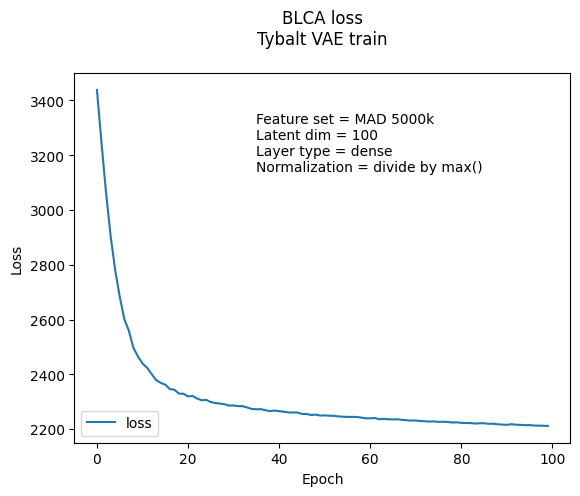

In [185]:
# Train on one loss plots
plt.plot(history.history['loss'],label="loss")

plt.title(cohort+' loss\nTybalt VAE train\n'
         )
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.annotate('Feature set = '+'MAD 5000k'+
             '\nLatent dim = '+str(latent_dim)+
             # '\nBatch size = '+str(batch_size)+
             '\nLayer type = dense'+
             # \nTest ratio = .25\n
             '\nNormalization = divide by max()',
            xy=(.4, .8), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            # fontsize=20
            )

plt.legend(loc="lower left")
plt.savefig('train-on-one_loss_plots/'+cohort+'_check2.png')

In [187]:
brca_df = pd.read_csv('data_5k/BRCA_mad_5k.tsv', sep="\t", index_col=0)

In [190]:
brca_df.iloc[:, 1:]

,N:GEXP::COL1A1:1277:,N:GEXP::FN1:2335:,N:GEXP::COL1A2:1278:,N:GEXP::COL3A1:1281:,N:GEXP::ADAM6:8755:,N:GEXP::MGP:4256:,N:GEXP::IGFBP5:3488:,N:GEXP::SPARC:6678:,N:GEXP::LOC96610:96610:,N:GEXP::ACTB:60:,...,N:GEXP::OGFRL1:79627:,N:GEXP::PMM2:5373:,N:GEXP::TATDN2:9797:,N:GEXP::SNAP23:8773:,N:GEXP::IMPACT:55364:,N:GEXP::C7orf68:29923:,N:GEXP::MST4:51765:,N:GEXP::SNAP29:9342:,N:GEXP::MMRN2:79812:,N:GEXP::AKR1B1:231:
BRCA,,,,,,,,,,,,,,,,,,,,,
TCGA-3C-AAAU,0.031385,0.039359,0.018842,0.031442,0.006549,0.003060,0.022639,0.020558,0.003330,0.136415,...,0.008571,0.239441,0.124286,0.236286,0.237124,0.026086,0.082640,0.309121,0.080230,0.098363
TCGA-3C-AALI,0.101237,0.091098,0.053656,0.071486,0.038961,0.001611,0.009053,0.040433,0.013666,0.348832,...,0.013655,0.303725,0.169249,0.128776,0.091827,0.289617,0.010398,0.363113,0.101590,0.070110
TCGA-3C-AALJ,0.102118,0.102970,0.051479,0.069342,0.019658,0.016429,0.009545,0.049109,0.027639,0.358672,...,0.046515,0.584199,0.166972,0.167441,0.171672,0.042127,0.024604,0.183706,0.146704,0.117168
TCGA-3C-AALK,0.245417,0.116361,0.128708,0.195194,0.015994,0.097137,0.023039,0.111954,0.015832,0.321840,...,0.032716,0.333033,0.099449,0.249399,0.168550,0.046800,0.031078,0.315361,0.174845,0.061419
TCGA-4H-AAAK,0.233795,0.208902,0.162215,0.238647,0.009210,0.088766,0.354656,0.123492,0.003744,0.308237,...,0.036679,0.248053,0.131196,0.168916,0.267576,0.054275,0.039614,0.254699,0.107060,0.077553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-WT-AB44,0.151985,0.066331,0.067384,0.068486,0.009339,0.016802,0.047206,0.056279,0.002394,0.735460,...,0.097934,0.574945,0.102419,0.187534,0.116411,0.050844,0.007741,0.430293,0.060763,0.063427
TCGA-XX-A899,0.115542,0.087292,0.066699,0.131443,0.008042,0.047529,0.018829,0.055552,0.005144,0.313509,...,0.055228,0.222253,0.125060,0.289308,0.194704,0.120155,0.042872,0.294341,0.281497,0.078021
TCGA-XX-A89A,0.254498,0.150192,0.130643,0.259711,0.080189,0.027200,0.066639,0.119086,0.018390,0.361050,...,0.058108,0.392215,0.117537,0.293152,0.155238,0.073995,0.020824,0.220071,0.310483,0.121370


In [192]:
cohort

'BLCA'

In [193]:
testOut_labeled.index.name

In [194]:
testOut_labeled

,Labels,N:GEXP::COL1A1:1277:,N:GEXP::FN1:2335:,N:GEXP::COL1A2:1278:,N:GEXP::COL3A1:1281:,N:GEXP::ADAM6:8755:,N:GEXP::MGP:4256:,N:GEXP::IGFBP5:3488:,N:GEXP::SPARC:6678:,N:GEXP::LOC96610:96610:,...,N:GEXP::OGFRL1:79627:,N:GEXP::PMM2:5373:,N:GEXP::TATDN2:9797:,N:GEXP::SNAP23:8773:,N:GEXP::IMPACT:55364:,N:GEXP::C7orf68:29923:,N:GEXP::MST4:51765:,N:GEXP::SNAP29:9342:,N:GEXP::MMRN2:79812:,N:GEXP::AKR1B1:231:
TCGA-2F-A9KO,BLCA_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-2F-A9KP,BLCA_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-2F-A9KQ,BLCA_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-2F-A9KR,BLCA_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-2F-A9KT,BLCA_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-WT-AB44,NaN,0.062673,0.052632,0.079877,0.032106,0.073971,0.074769,0.080457,0.052074,0.098387,...,0.309655,0.282711,0.101818,0.313494,0.317376,0.409937,0.283704,0.108887,0.071934,0.454997
TCGA-XX-A899,NaN,0.075498,0.060056,0.119321,0.039069,0.087684,0.108570,0.135048,0.053291,0.112943,...,0.323456,0.292460,0.134627,0.355730,0.343839,0.424406,0.266858,0.127033,0.092723,0.456663
TCGA-XX-A89A,NaN,0.076498,0.061102,0.121474,0.038914,0.092990,0.116566,0.135720,0.050381,0.112232,...,0.325491,0.290727,0.133669,0.344105,0.331878,0.431782,0.270832,0.139149,0.090876,0.455848
TCGA-Z7-A8R5,NaN,0.081716,0.071411,0.096894,0.049078,0.101265,0.088095,0.101006,0.067576,0.114666,...,0.316676,0.276143,0.115317,0.330355,0.334539,0.420580,0.286537,0.130640,0.090759,0.477831


In [197]:
len(y_df)

399

In [196]:
len(test)

995

In [198]:
encoder = Model(encoder_inputs, z_mean_encoded)
decoder_input = keras.Input(shape=(latent_dim, ))  # can generate from any sampled z vector
_x_decoded_mean = decoder_to_reconstruct(decoder_input)
decoder = Model(decoder_input, _x_decoded_mean)

test = brca_df.iloc[:, 1:]
y_df = brca_df.Labels
testOut = pd.DataFrame(decoder.predict(encoder.predict(test)),
                       index=test.index, columns=test.columns)
testOut_labeled = pd.concat( [pd.DataFrame(y_df), testOut] , axis =1)
testOut_labeled.to_csv(
    't1pa_decoded/'+cohort+'_trained_'+testOut_labeled.index.name+'_decoded.tsv',
    sep = '\t')

/Users/karlberb/miniforge3/envs/tf_M1_py3dot9/lib/python3.9/site-packages/keras/engine/training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2022-11-07 09:49:05.654683: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-07 09:49:05.931288: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


### Fine-tune templates, from baseline_v5

In [148]:
history_fine_tune = vae.fit(brca_df.iloc[:, 1:],  
                epochs=epochs, batch_size=50, shuffle=True,
                callbacks=[WarmUpCallback(beta, kappa)])

Train on 995 samples
Epoch 1/100
995/995 [==============================] - 0s 448us/sample - loss: 2445.4500
Epoch 2/100
995/995 [==============================] - 0s 252us/sample - loss: 2206.2838
Epoch 3/100
995/995 [==============================] - 0s 258us/sample - loss: 2142.7792
Epoch 4/100
995/995 [==============================] - 0s 259us/sample - loss: 2122.0310
Epoch 5/100
995/995 [==============================] - 0s 269us/sample - loss: 2112.1658
Epoch 6/100
995/995 [==============================] - 0s 257us/sample - loss: 2107.7456
Epoch 7/100
995/995 [==============================] - 0s 264us/sample - loss: 2101.9470
Epoch 8/100
995/995 [==============================] - 0s 269us/sample - loss: 2098.3280
Epoch 9/100
995/995 [==============================] - 0s 267us/sample - loss: 2093.2197
Epoch 10/100
995/995 [==============================] - 0s 275us/sample - loss: 2090.7495
Epoch 11/100
995/995 [==============================] - 0s 267us/sample - loss: 2089.153

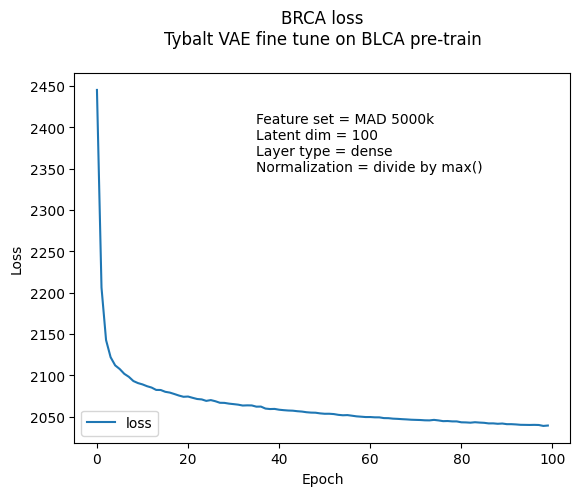

In [150]:
# Fine tune plots
cohort = brca_df.index.name
plt.plot(history_fine_tune.history['loss'],label="loss")

plt.title(cohort+' loss\nTybalt VAE fine tune on BLCA pre-train\n'
         )
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.annotate('Feature set = '+'MAD 5000k'+
             '\nLatent dim = '+str(latent_dim)+
             '\nLayer type = dense'+
             '\nNormalization = divide by max()',
            xy=(.4, .8), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            )

plt.legend(loc="lower left")
plt.savefig('transfer_learning_loss_plots/'+cohort+'_fine_blca_bbox.png',
            bbox_inches='tight')

### Predict with RF on Train-on-one, predict on another, gen object for plot

In [206]:
 # Raw baseline F1 scores on 5k feats for plotting
plt_v = plt_v         # to plot naming
trn_tst_splts = trn_tst_splts # trn_tst_splts
re_samp = re_samp      

blnk_frm = pd.DataFrame()
for path in [path]:
    cohort = path.split('/')[1].split('.')[0]
    print(cohort)
    
    df = pd.read_csv(path, sep="\t", index_col=0)
    features = df.iloc[:, 1:] #.mad().sort_values(ascending=False)[:5000].index

    F1_dct = {}
    for j in list(range(0, re_samp)): # 100% sampling rate
        X = df.iloc[:, 1:]
        y = df.iloc[:, 0]
        output = []
        for i in list(range(0, trn_tst_splts)): # number of train test splits
            X_train, X_test, y_train, y_test = train_test_split(
                X, y,
                    test_size=0.33,
                        )
            clf = RandomForestClassifier(max_depth=2, # reset the classifier each time through loop
                )
            clf.fit(X_train, y_train)
            F1_scr = f1_score(y_test, clf.predict(X_test), average='weighted')
            output.append(F1_scr) # extracting stats and overwriting, str(clf)
                                  
        F1_dct['mean'+str(j)] = mean(output)
        F1_dct['std'+str(j)] = stdev(output)

    chrt_frm = pd.DataFrame(F1_dct, index = [cohort + '_' + str(clf)])
    blnk_frm = pd.concat( [blnk_frm, chrt_frm] )
    # print('path loop done')

print('all done')

BLCA_trained_BRCA_decoded
all done


In [207]:
blnk_frm

,mean0,std0,mean1,std1,mean2,std2,mean3,std3,mean4,std4
BLCA_trained_BRCA_decoded_RandomForestClassifier(max_depth=2),0.564859,0.024353,0.559046,0.025538,0.54621,0.042252,0.568318,0.031994,0.565567,0.026116


In [27]:
blnk_frm.to_csv('decoded_baseline_F1s/5k_r0.tsv', sep = '\t')

In [155]:
bfr = pd.read_csv('decoded_baseline_F1s/5k_r0.tsv', sep = '\t', index_col = 0)

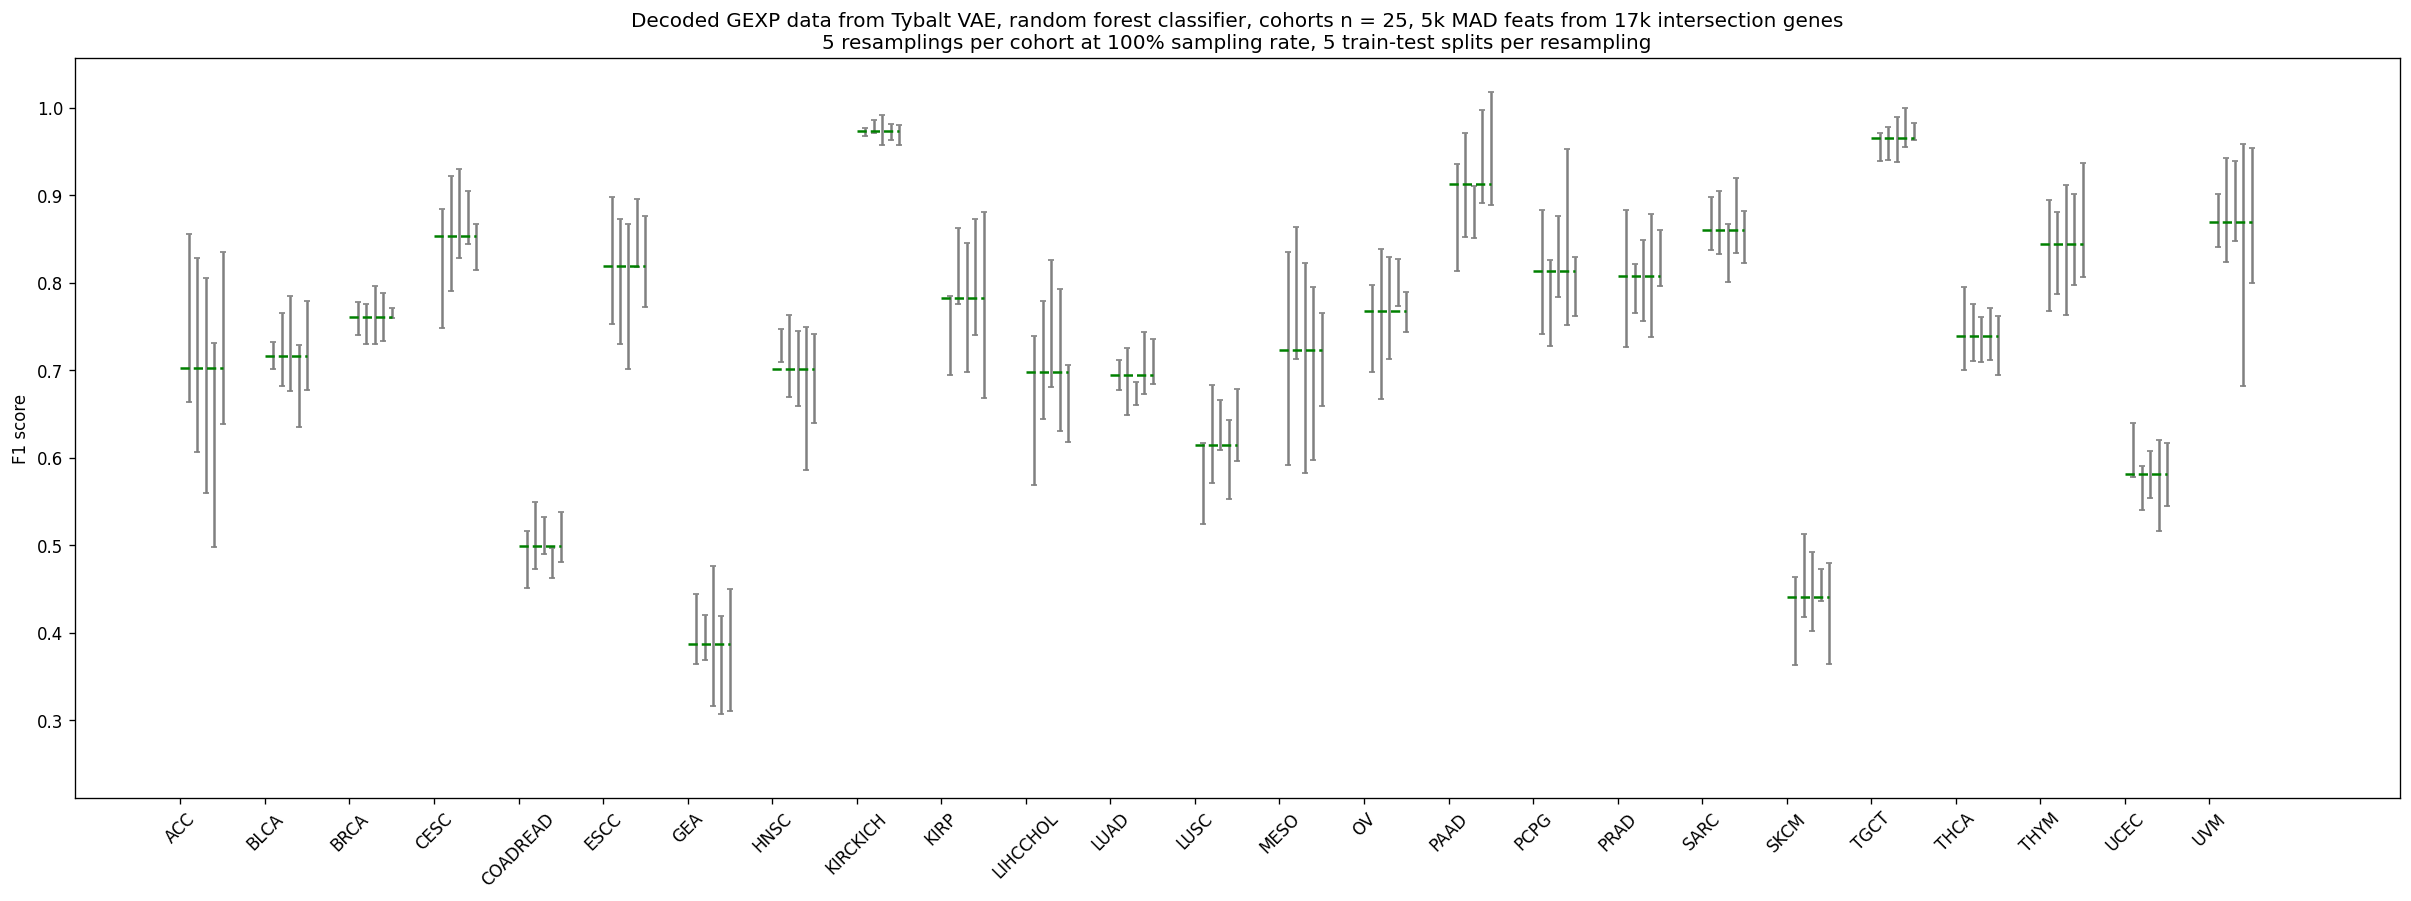

In [156]:
# Decoded samples, time to design new application file architechture
    # Original data classical ML predictions
    # OG data plot
    # Decoded sample production
    # Decoded sample plot (this cell)
    # Train on one cancer type, predict on another (auto mate)
    # Run time comparison - script to exacloud
    # Pre-train / weight setting without layer freezing
plt_v=14 # first 
figure(figsize=(len(bfr.index), 8), dpi=120)
plt.scatter(.01, .99, color = 'white')
x_tck_lst = []
cohort_list = []
for idx_pos, idx in enumerate(bfr.index):

    x = idx_pos
    ave_mean = []
    for rs in list(range(0,re_samp)): # use to step through the columns

        adder = .1
        x = x+adder
        plt.errorbar(
            x,
            bfr.loc[idx, 'mean'+str(rs)],
            yerr=bfr.loc[idx, 'std'+str(rs)], capsize = 2,
            color = 'grey')
        ave_mean.append(bfr.loc[idx, 'mean'+str(rs)])
        
    x_points = [x-.5, x]
    y_points = [mean(ave_mean), mean(ave_mean)]
    plt.plot(x_points, y_points, linestyle='dashed', color = 'green')
    # break
    x_tck_lst.append(idx_pos)
    cohort_list.append(idx.split('_')[0])
plt.xticks(x_tck_lst, labels = cohort_list, rotation = 45)
plt.ylabel('F1 score')
plt.scatter(25, .25, color = 'white')# BRCA settings    
plt.title('Decoded GEXP data from Tybalt VAE, random forest classifier, cohorts n = 25, 5k MAD feats from 17k intersection genes\n'+
         '5 resamplings per cohort at 100% sampling rate, 5 train-test splits per resampling')
plt.annotate(str(re_samp * trn_tst_splts)+' trn tst splts', (x-.2,1.-3))
plt.savefig('decoded_baseline_plots/dec_cohorts_n=25_'+str(plt_v)+'.png', dpi = 120)

In [23]:
# future improvements
    # save loss plots

In [ ]:
# Notes, t1pa (train on one, predict on another)
    if len(history.history['loss']) == 50:
        print('half done')

In [ ]:
# Original umap section, to cut in v4